## Create a summary of the text below using NLP libraries: nltk and SpaCy

In [12]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation
from heapq import nlargest
import matplotlib.pyplot as plt

In [13]:
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
input_text = "The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions. She had the honor of being chosen as the Return to Flight vehicle after both the Challenger and Columbia accidents. Discovery was the first shuttle to fly with the redesigned SRBs, a result of the Challenger accident, and the first shuttle to fly with the Phase II and Block I SSME. Discovery also carried the Hubble Space Telescope to orbit and performed two of the five servicing missions to the observatory. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission. In addition, Discovery was vital to the construction of the International Space Station (ISS); she flew thirteen of the thirty-seven total missions flown to the station by a U.S. Space Shuttle. She was the first orbiter to dock to the ISS, and the first to perform an exchange of a resident crew. Under Criterion C, Discovery is significant as a feat of engineering. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use, ablative heat shield. Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System. As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,” having regularly flown at twenty-five times the speed of sound."


In [15]:
doc = nlp(input_text)
tokens = [token.text for token in doc]

print(tokens)

['The', 'Orbiter', 'Discovery', ',', 'OV-103', ',', 'is', 'considered', 'eligible', 'for', 'listing', 'in', 'the', 'National', 'Register', 'of', 'Historic', 'Places', '(', 'NRHP', ')', 'in', 'the', 'context', 'of', 'the', 'U.S.', 'Space', 'Shuttle', 'Program', '(', '1969', '-', '2011', ')', 'under', 'Criterion', 'A', 'in', 'the', 'areas', 'of', 'Space', 'Exploration', 'and', 'Transportation', 'and', 'under', 'Criterion', 'C', 'in', 'the', 'area', 'of', 'Engineering', '.', 'Because', 'it', 'has', 'achieved', 'significance', 'within', 'the', 'past', 'fifty', 'years', ',', 'Criteria', 'Consideration', 'G', 'applies', '.', 'Under', 'Criterion', 'A', ',', 'Discovery', 'is', 'significant', 'as', 'the', 'oldest', 'of', 'the', 'three', 'extant', 'orbiter', 'vehicles', 'constructed', 'for', 'the', 'Space', 'Shuttle', 'Program', '(', 'SSP', ')', ',', 'the', 'longest', 'running', 'American', 'space', 'program', 'to', 'date', ';', 'she', 'was', 'the', 'third', 'of', 'five', 'orbiters', 'built', 'b

In [16]:
tokens = word_tokenize(input_text)
sentences = sent_tokenize(input_text)
stop_words = set(stopwords.words('english'))
punctuation = punctuation + '\n'


print("NLTK Tokens:", tokens)
print("NLTK Sentences:", sentences)
print("Stop Words:", stop_words)
print("Punctuation:", punctuation)

NLTK Tokens: ['The', 'Orbiter', 'Discovery', ',', 'OV-103', ',', 'is', 'considered', 'eligible', 'for', 'listing', 'in', 'the', 'National', 'Register', 'of', 'Historic', 'Places', '(', 'NRHP', ')', 'in', 'the', 'context', 'of', 'the', 'U.S.', 'Space', 'Shuttle', 'Program', '(', '1969-2011', ')', 'under', 'Criterion', 'A', 'in', 'the', 'areas', 'of', 'Space', 'Exploration', 'and', 'Transportation', 'and', 'under', 'Criterion', 'C', 'in', 'the', 'area', 'of', 'Engineering', '.', 'Because', 'it', 'has', 'achieved', 'significance', 'within', 'the', 'past', 'fifty', 'years', ',', 'Criteria', 'Consideration', 'G', 'applies', '.', 'Under', 'Criterion', 'A', ',', 'Discovery', 'is', 'significant', 'as', 'the', 'oldest', 'of', 'the', 'three', 'extant', 'orbiter', 'vehicles', 'constructed', 'for', 'the', 'Space', 'Shuttle', 'Program', '(', 'SSP', ')', ',', 'the', 'longest', 'running', 'American', 'space', 'program', 'to', 'date', ';', 'she', 'was', 'the', 'third', 'of', 'five', 'orbiters', 'built

In [17]:
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stop_words:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1

In [18]:
max_frequency = max(word_frequencies.values())

for word in word_frequencies:
    word_frequencies[word] = word_frequencies[word] / max_frequency

In [19]:
sentence_tokens = [sent for sent in doc.sents]

In [20]:
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies:
            if sent not in sentence_scores:
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]

In [21]:
percentage = 0.1
select_length = int(len(sentence_tokens) * percentage)
summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)

final_summary = [word.text for word in summary]
summary = ' '.join(final_summary)

print(summary)

Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions.


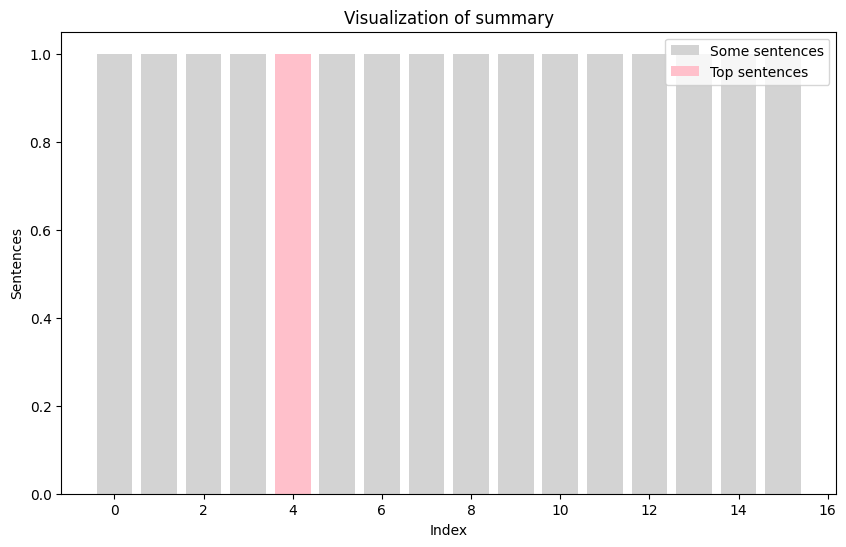

In [22]:
plt.figure(figsize=(10, 6))
plt.xlabel('Index')
plt.ylabel('Sentences')
plt.title('Visualization of summary')

important_indices = [i for i, sentence in enumerate(sentences) if sentence in summary]
plt.bar(range(len(sentences)), [1] * len(sentences), color='lightgrey', label='Some sentences')
plt.bar(important_indices, [1] * len(important_indices), color='pink', label='Top sentences')
plt.legend()
plt.show()

## SUMMARY

In this project has successfully used the spaCy and NLTK libraries for textual data analysis. Several key functionalities have been implemented, including tokenization, word frequency analysis, and sentence counting for generalization.

1. **Tokenization of text:**
- spaCy was used to efficiently tokenize text into words and sentences.
- NLTK was used for further text processing, including loading and using stop words to filter common words.

2. **Word frequency analysis:** a method of calculating the frequency of each word in the text, ignoring case and punctuation, has been developed. This analysis helped identify the most common words, providing insight into the key themes and topics of the text.

3. **Counting Sentences and Summarizing:** By counting the frequency of each word, he was able to rate sentences based on the meaning of the words they contain. Then selected the sentences with the highest scores to form a concise summary of the text, effectively capturing the main ideas and important details.

4. **Normalization and Filtering:** Normalized word frequency to ensure fair scoring across sentences. Filtering out irrelevant words and punctuation ensured that our analysis focused on meaningful content.

# Result:

During this process, it is clear that preprocessing steps are really important, especially things like tokenization and stop word removal in natural language processing tasks. The integration of spaCy and NLTK allowed us to take advantage of the strengths of both libraries, creating a robust and efficient text analysis solution.